In [21]:
#reading and displaying few records from the dataset
import pandas as pd
import numpy as np

In [22]:
#loading the dataset
bank_df = pd.read_csv(r"C:\Users\dell\Desktop\Current\Machine Learning\Python Programs\PYTHON_DATA\BANK_MARKETING.csv")

In [23]:
bank_df.head(5)

,age,job,marital,education,Credit Default,balance,Housing Loan,Personal Loan,duration,Subscription
0,30,unemployed,married,primary,0,1787,0,0,79,0
1,33,services,married,secondary,0,4789,1,1,220,0
2,35,management,single,tertiary,0,1350,1,0,185,0
3,30,management,married,tertiary,0,1476,1,1,199,0
4,59,blue-collar,married,secondary,0,0,1,0,226,0


In [24]:
X_features = list(bank_df)
X_features.remove('Subscription')

In [25]:
encoded_bank_df = pd.get_dummies(bank_df[X_features],drop_first = True)
list(encoded_bank_df.columns)

['age',
 'Credit Default',
 'balance',
 'Housing Loan',
 'Personal Loan',
 'duration',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown']

In [27]:
import statsmodels.api as sm 
Y = bank_df.Subscription
X = sm.add_constant(encoded_bank_df)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [29]:
import statsmodels.api as sm
logit = sm.Logit(Y_train,X_train)
logit_model = logit.fit()


Optimization terminated successfully.
         Current function value: 0.274960
         Iterations 7


In [30]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.236     
Dependent Variable:   Subscription     AIC:              1439.4984 
Date:                 2019-10-23 10:21 BIC:              1573.7622 
No. Observations:     2534             Log-Likelihood:   -696.75   
Df Model:             22               LL-Null:          -911.54   
Df Residuals:         2511             LLR p-value:      3.1479e-77
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -3.0787   0.5670 -5.4301 0.0000 -4.1899 -1.9674
age                  0.0105   0.0087  1.2054 0.2281 -0.0066  0.0275
Credit Default       0.4158   0.5921  0.7023 0.4825 -0.7446  1.5762
balance              0.0000   0.0000  1.4524 0.1464 -0.0000  0.0001
Housing Loan        -0.7760   0.1556 -4.9868 0.0000 -1.0810 -0.4710
Personal Loan       -1.0045   0.2618 -3.8361 0.0001 -1.5177 -0.4913
duration             0.0041   0.0003 16.0651 0.0000  0.0036  0.0046
job_blue-collar     -0.9484   0.3098 -3.0613 0.0022 -1.5556 -0.3412
job_entrepreneur    -0.8953   0.4881 -1.8344 0.0666 -1.8519  0.0613
job_housemaid       -0.5738   0.5455 -1.0520 0.2928 -1.6429  0.4953
job_management      -0.2993   0.3000 -0.9975 0.3185 -0.8873  0.2887
job_retired          0.1138   0.3756  0.3030 0.7619 -0.6223  0.8499
job_self-employed   -0.7493   0.4214 -1.7782 0.0754 -1.5752  0.0766
job_services        -0.6464   0.3523 -1.8349 0.0665 -1.3369  0.0441
job_student          0.5580   0.4888  1.1416 0.2536 -0.4000  1.5161
job_technician      -0.3183   0.2809 -1.1333 0.2571 -0.8688  0.2322
job_unemployed      -1.3628   0.5899 -2.3103 0.0209 -2.5189 -0.2067
job_unknown          0.3018   0.6596  0.4575 0.6473 -0.9910  1.5945
marital_married     -0.2569   0.2174 -1.1818 0.2373 -0.6830  0.1692
marital_single      -0.0360   0.2579 -0.1394 0.8891 -0.5415  0.4696
education_secondary  0.1878   0.2490  0.7545 0.4506 -0.3001  0.6758
education_tertiary   0.4351   0.2839  1.5328 0.1253 -0.1213  0.9915
education_unknown   -0.3518   0.4435 -0.7933 0.4276 -1.2212  0.5175
===================================================================

"""

In [1]:
def get_significant_vars(x):
    var_p_vals_df = pd.DataFrame(x.pvalues)
    #print(var_p_vals_df)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    #print(var_p_vals_df['pvals'],var_p_vals_df['vars'])
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]["vars"])

In [32]:
significant_vars = get_significant_vars(logit_model)

In [33]:
significant_vars

['const',
 'Housing Loan',
 'Personal Loan',
 'duration',
 'job_blue-collar',
 'job_unemployed']

In [34]:
final_logit = sm.Logit(Y_train,sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.280259
         Iterations 7


In [35]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.221     
Dependent Variable: Subscription     AIC:              1432.3529 
Date:               2019-10-23 10:23 BIC:              1467.3782 
No. Observations:   2534             Log-Likelihood:   -710.18   
Df Model:           5                LL-Null:          -911.54   
Df Residuals:       2528             LLR p-value:      7.6550e-85
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -2.6898   0.1247 -21.5652 0.0000 -2.9342 -2.4453
Housing Loan     -0.8939   0.1463  -6.1103 0.0000 -1.1807 -0.6072
Personal Loan    -1.0428   0.2555  -4.0813 0.0000 -1.5436 -0.5420
duration          0.0040   0.0002  16.2154 0.0000  0.0035  0.0045
job_blue-collar  -0.8451   0.2145  -3.9408 0.0001 -1.2654 -0.4248
job_unemployed   -1.1728   0.5423  -2.1626 0.0306 -2.2358 -0.1099
=================================================================

"""

In [36]:
Y_pred_df = pd.DataFrame({"actual": Y_test, "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))})

In [37]:
Y_pred_df.sample(10,random_state = 42)

,actual,predicted_prob
2699,0,0.041067
1650,0,0.068950
3337,0,0.016906
925,0,0.038908
528,0,0.041266
1688,0,0.047025
1539,0,0.012266
69,0,0.116030
761,0,0.016707
1356,0,0.139035


In [38]:
Y_pred_df['predicted'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x >0.5 else 0)

In [39]:
Y_pred_df.sample(10,random_state = 42)

,actual,predicted_prob,predicted
2699,0,0.041067,0
1650,0,0.068950,0
3337,0,0.016906,0
925,0,0.038908,0
528,0,0.041266,0
1688,0,0.047025,0
1539,0,0.012266,0
69,0,0.116030,0
761,0,0.016707,0
1356,0,0.139035,0


In [40]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [42]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sn.heatmap(cm, annot=True, fmt='0.2f', 
               xticklabels = ["failure","success"],
               yticklabels = ["failure","success"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

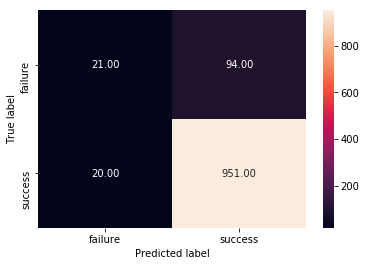

In [43]:
draw_cm(Y_pred_df.actual,Y_pred_df.predicted)

In [44]:
print(metrics.classification_report(Y_pred_df.actual,Y_pred_df.predicted))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94       971
          1       0.51      0.18      0.27       115

avg / total       0.87      0.90      0.87      1086



In [45]:
def draw_roc(actual,probs):
    fpr,    tpr,    thresholds = metrics.roc_curve(actual,probs,drop_intermediate = True)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (12,8))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return thresholds

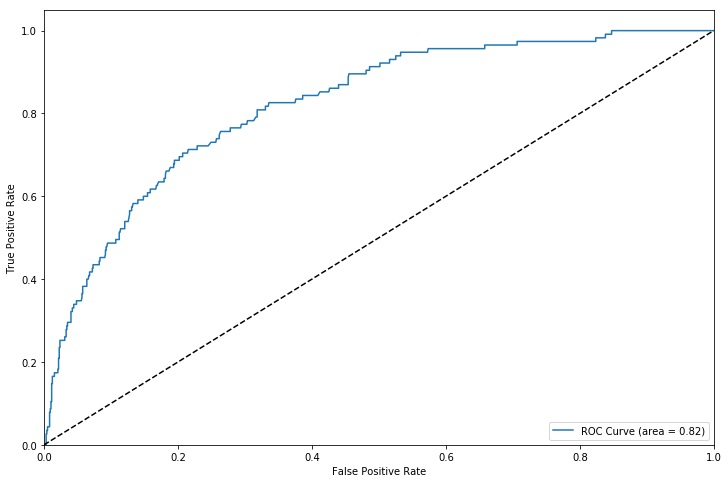

In [46]:
thresholds = draw_roc(Y_pred_df.actual,Y_pred_df.predicted_prob)